In [1]:
import cfr
import pandas as pd

## Load the dataset

In [3]:
df = pd.read_pickle('./ch2k.pkl')
df.head()

,datasetId,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_notes
0,ch2kKA17RYU01,KA17RYU01,coral,-3.5,28.3,130.0,"[1578.58, 1579.08, 1579.58, 1580.08, 1580.58, ...",AD,SrCa,mmol/mol,"[8.802, 9.472, 8.825, 9.355, 8.952, 9.297, 8.8...",Core data is a composite of overlapping indivi...
2,ch2kCH18YOA02,CH18YOA02,coral,NaN,16.448,111.605,"[1987.92, 1988.085, 1988.25, 1988.42, 1988.585...",AD,SrCa,mmol/mol,"[8.58, 8.683, 8.609, 8.37, 8.38, 8.417, 8.584,...",Microatoll; coral rubble samples; data reporte...
4,ch2kFL17DTO02,FL17DTO02,coral,-3.0,24.699,-82.799,"[1837.04, 1837.13, 1837.21, 1837.29, 1837.38, ...",AD,SrCa,mmol/mol,"[9.159, 9.257, 9.245, 9.166, 9.045, 9.013, 8.9...",NaN
6,ch2kFL17DTO02,FL17DTO02,coral,-3.0,24.699,-82.799,"[1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842....",AD,SrCa_annual,mmol/mol,"[9.053, 9.01, 8.984, 9.062, 9.054, 9.017, 8.99...",NaN
8,ch2kBO14HTI01,BO14HTI01,coral,-3.6,12.21,109.31,"[1977.37, 1977.45, 1977.54, 1977.62, 1977.7, 1...",AD,d18O,permil,"[-5.4206, -5.3477, -5.1354, -5.7119, -5.9058, ...",A composite of cores TN and BB (CoralHydro2k I...


## Create a `cfr.ProxyDatabase` object

In [5]:

pdb = cfr.ProxyDatabase().from_df(
    df,
    proxy_type_column='paleoData_variableName',
    pid_column='datasetId',
)


## Visualize the spatiotemporal availability of the records

(1000.0, 2000.0)

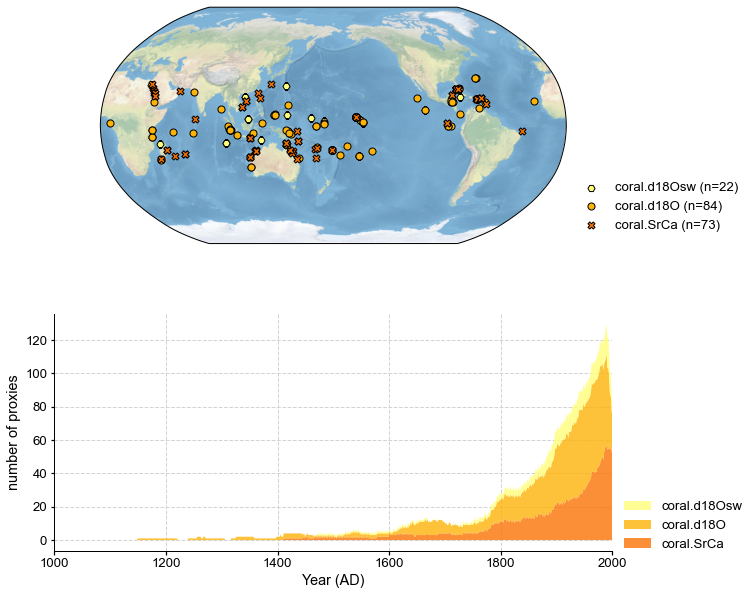

In [6]:
fig, ax = pdb.plot(plot_count=True)
ax['count'].set_xlim(1000, 2000)

## Check site IDs with an interactive map

In [8]:
# to check site IDs
pdb.plotly()

## Check a specific record

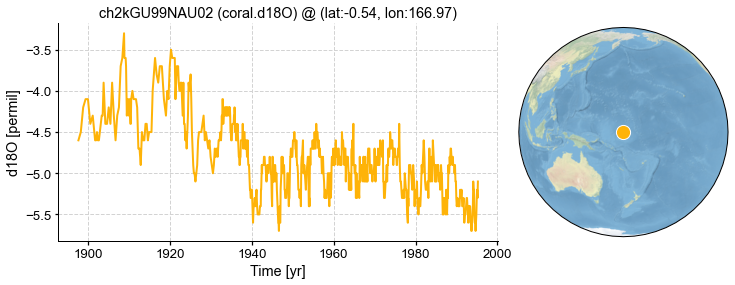

In [12]:
pobj = pdb['ch2kGU99NAU02']
fig, ax = pobj.plot()

In [15]:
# to confirm the data is sub-annual
pobj.dt

0.09999999999990905

## Seasonalize the record

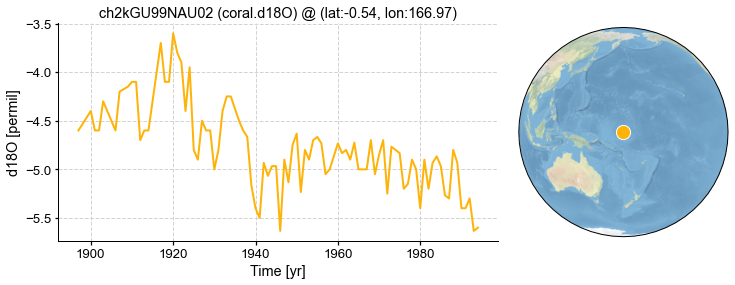

In [16]:
pobj_JJA = pobj.annualize(months=[6, 7, 8])
fig, ax = pobj_JJA.plot()